In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_excel('61331_Classes_FS01-US16_part1.xlsx', skip_footer=264999)
df = df[df.grade_code.isin(('2.5', '3.0', '1.0', '1.5', '2.0', '0.0', '4.0', '3.5',))]
df['grade_code'] = df.grade_code.astype(float)

In [21]:
df.head(10)

,placeholderID,term_seq_id,term_code,subj_code,crse_code,sctn_code,grade_code,repeat_status_flag,major code,major name
0,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1014,FS01,PHY,251,24.0,2.5,,3611.0,Earth Science
1,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,MTH,126,5.0,3.0,SR,3611.0,Earth Science
2,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,232,1.0,1.0,,3611.0,Earth Science
3,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,252,20.0,1.5,,3611.0,Earth Science
4,592FB87B-B37F-476D-B7F0-0001F057D6A6,1014,FS01,MTH,110,8.0,2.0,,4494.0,Social Work
5,9C41EAAC-FC57-42F9-B53F-000201BE35C3,1054,FS05,MTH,103,1.0,2.0,,1069.0,General Business Admin Prelaw
6,9C41EAAC-FC57-42F9-B53F-000201BE35C3,1056,SS06,MTH,124,3.0,2.5,,4380.0,Political Science Prelaw
7,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1054,FS05,MTH,103,2.0,3.0,,5151.0,No Preference
8,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1064,FS06,MTH,124,27.0,2.0,,3969.0,Human Biology
9,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1076,SS08,PHY,231C,730.0,2.5,,3969.0,Human Biology


In [16]:
df_agg = df.groupby(['placeholderID', 'term_seq_id', 'subj_code']).grade_code.describe().reset_index()

In [32]:
df_agg = df.groupby(['placeholderID', 'term_seq_id']).grade_code.describe().reset_index()

In [33]:
df_agg.head()

,placeholderID,term_seq_id,count,mean,std,min,25%,50%,75%,max
0,000A100B-CF8A-4B1F-BEEE-039F0D231E69,1104,1.0,1.50,NaN,1.5,1.500,1.50,1.500,1.5
1,000A100B-CF8A-4B1F-BEEE-039F0D231E69,1134,1.0,3.00,NaN,3.0,3.000,3.00,3.000,3.0
2,000A100B-CF8A-4B1F-BEEE-039F0D231E69,1136,2.0,2.25,0.353553,2.0,2.125,2.25,2.375,2.5
3,00159A18-E6EF-42C6-A7D6-007DEB4934A2,1164,1.0,2.50,NaN,2.5,2.500,2.50,2.500,2.5
4,001DF31C-E9D2-4321-B8CC-0388E847D423,1156,2.0,2.00,0.000000,2.0,2.000,2.00,2.000,2.0


In [59]:
semesterid = df_agg.groupby('placeholderID').term_seq_id.count().apply(lambda x: np.arange(x))

In [64]:
# [item for sublist in l for item in sublist]
df_agg['semesterid'] = [item for sublist in semesterid for item in sublist]

In [72]:
df_agg.shape

(6348, 11)

In [73]:
df_agg['mean'].shape

(6348,)

In [77]:
df_agg['meandiff'] = df_agg['mean'].diff()

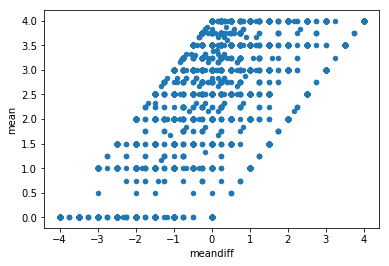

In [83]:
df_agg.plot(kind='scatter', x='meandiff', y='mean')

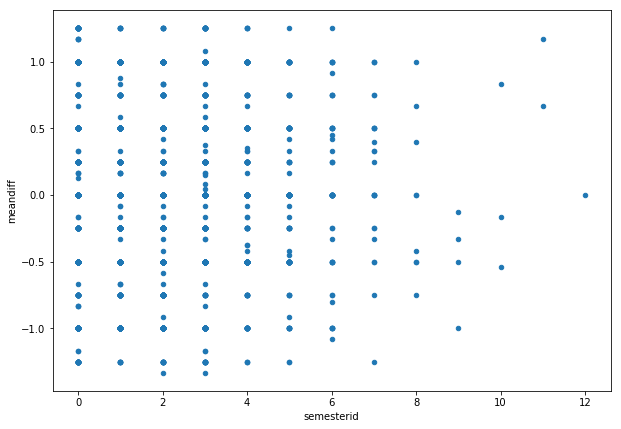

In [113]:
fig, ax = plt.subplots(figsize=(10, 7))

data = df_agg[df_agg.meandiff.between(-df_agg.meandiff.std(), df_agg.meandiff.std())].copy()

data.plot(kind='scatter', x='semesterid', y='meandiff', ax=ax)
x = sorted(data.semesterid.unique())
y = data.groupby('semesterid').meandiff.mean()

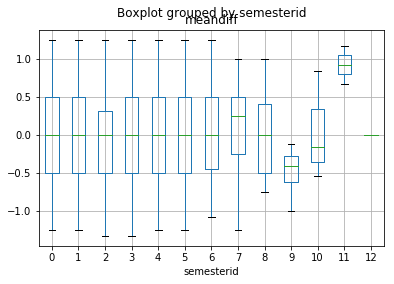

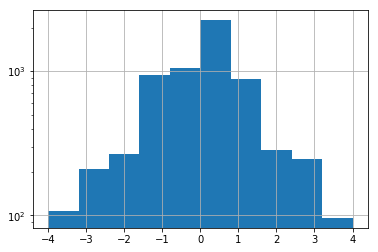

In [100]:
df_agg.meandiff.hist(log=True)

In [26]:
df.head()

,placeholderID,term_seq_id,term_code,subj_code,crse_code,sctn_code,grade_code,repeat_status_flag,major code,major name
0,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1014,FS01,PHY,251,24.0,2.5,,3611.0,Earth Science
1,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,MTH,126,5.0,3.0,SR,3611.0,Earth Science
2,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,232,1.0,1.0,,3611.0,Earth Science
3,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,252,20.0,1.5,,3611.0,Earth Science
4,592FB87B-B37F-476D-B7F0-0001F057D6A6,1014,FS01,MTH,110,8.0,2.0,,4494.0,Social Work


In [27]:
df['course_id'] = df['subj_code'] + df['crse_code']

In [28]:
df['course_id'] = df['course_id'].apply(lambda x: x[:-1] if len(x)==7 else x)

In [29]:
df.grade_code.unique()

array(['2.5', '3.0', '1.0', '1.5', '2.0', '0.0', 'T', '4.0', '3.5', 'WV',
       'P', 'TWV', 'U', 'N', 'WVR', 'WV1', 'T1', 'W', ' ', 'V', 'I'], dtype=object)

In [30]:
df = df[df.grade_code.isin(('2.5', '3.0', '1.0', '1.5', '2.0', '0.0', '4.0', '3.5',))]

In [32]:
df['grade_code'] = df.grade_code.astype(float)

In [36]:
physics = df[df.subj_code == 'PHY']

In [42]:
physics_aggregate = physics.groupby('course_id').describe()

In [48]:
physics_aggregate = physics_aggregate['grade_code']

In [54]:
physics_aggregate = physics_aggregate[physics_aggregate['count'] >= 100]

In [56]:
pdiff = physics_aggregate.diff()

In [64]:
t = np.arange(len(physics_aggregate.index))

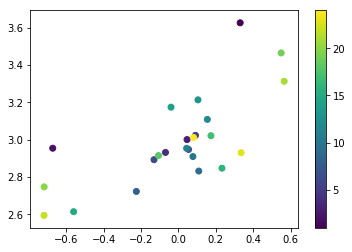

In [66]:
fig, ax = plt.subplots()

y = physics_aggregate['mean']
x = pdiff['mean']

cbar = ax.scatter(x, y, marker='o', c=t)
fig.colorbar(cbar)